<a href="https://colab.research.google.com/github/sengorajkumar/machinehack-github-issues-classification/blob/main/github_issues_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
import torch
import fastai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#import commands
#print(commands.getoutput('nvidia-smi'))

In [ ]:
defaults.device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/ml/github'
train = pd.read_json('/content/drive/My Drive/ml/github/embold_train.json')
test = pd.read_json('/content/drive/My Drive/ml/github/embold_test.json')
train_extra = pd.read_json('/content/drive/My Drive/ml/github/embold_train_extra.json')

Labels:
* Bug - 0
* Feature - 1
* Question - 2

In [ ]:
train.label.value_counts()

1    69106
0    66827
2    14067
Name: label, dtype: int64

In [ ]:
train.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [ ]:
import re
def remove_url(text):
# function to remove urls
  return (re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',text))

def replace_r(text):
  return text.replace(' r ', '')

def remove_whitespace(text):
  return ' '.join(text.split())

In [ ]:
train['body'] = train['body'].apply(remove_url)
#train['body'] = train['body'].astype('str') 
#train['body'] = train['body'].str.replace("\\r","")
train['body'] = train['body'].str.replace("[^a-zA-Z]", " ")
train['body'] = train['body'].apply(replace_r)
train['body'] = train['body'].apply(remove_whitespace)

#train.dtypes
print(train.iloc[6][1])
#re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', train.iloc[6][1])
#

release electron v beta electron electron


In [ ]:
print(train.iloc[1668][1])


hi i fount this code for android to open webview urls outside of the app exports webviewloaded function args var webview args object var tnswebviewclient android webkit webviewclient extend shouldoverrideurlloading function view url if url null url startswith https console log url utilitymodule openurl url return true else return false if isandroid webview android getsettings setdisplayzoomcontrols false webview android getsettings setbuiltinzoomcontrols false webview android setwebviewclient new tnswebviewclient it works fine is there a way to do the same for ios thank you r


In [ ]:
train['title'] = train['title'].apply(remove_url)
train['title'] = train['title'].str.replace("[^a-zA-Z]", " ")
train['title'] = train['title'].apply(replace_r)
train['title'] = train['title'].apply(remove_whitespace)

In [ ]:
train.head()

,title,body,label
0,y zoom piano roll,a y zoom on the piano roll would be useful,1
1,buggy behavior in selection,screenshot from r,0
2,auto update feature,hi great job so far saenzramiro an auto update...,1
3,filter out noisy endpoints in logs,i think we should stop logging requests to hea...,1
4,enable pid on pid off alarm actions for arduin...,expected behavioralarm actions pid on and pid ...,0


In [ ]:
mapping = {
  0: 'bug',
  1: 'feature',
  2: 'question'}

In [ ]:
train["text"] = train["title"] + train["body"]

In [ ]:
train

,title,body,label,text
0,y zoom piano roll,a y zoom on the piano roll would be useful,1,y zoom piano rolla y zoom on the piano roll wo...
1,buggy behavior in selection,screenshot from r,0,buggy behavior in selectionscreenshot from r
2,auto update feature,hi great job so far saenzramiro an auto update...,1,auto update featurehi great job so far saenzra...
3,filter out noisy endpoints in logs,i think we should stop logging requests to hea...,1,filter out noisy endpoints in logsi think we s...
4,enable pid on pid off alarm actions for arduin...,expected behavioralarm actions pid on and pid ...,0,enable pid on pid off alarm actions for arduin...
...,...,...,...,...
149995,suggestion getinventorylist should return rand...,note anything within these brackets will be hi...,1,suggestion getinventorylist should return rand...
149996,decoder displays some neurovault images incorr...,as noted by nicholst some neurovault images do...,0,decoder displays some neurovault images incorr...
149997,parser should return an error not an exception,for this raml yaml raml title testbaseuri name...,0,parser should return an error not an exception...
149998,errorexception array to string conversion on p...,see above occurs in branch routes,0,errorexception array to string conversion on p...


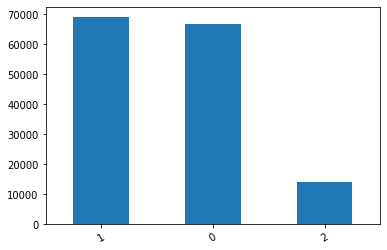

In [ ]:
train['label'].value_counts().plot.bar(rot=30);
#https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

In [ ]:
train = train.drop(['title', 'body'], axis=1)

In [ ]:
print("Cuda available" if torch.cuda.is_available() is True else "CPU")

Cuda available


In [ ]:
train

,label,text
0,1,y zoom piano rolla y zoom on the piano roll wo...
1,0,buggy behavior in selectionscreenshot from r
2,1,auto update featurehi great job so far saenzra...
3,1,filter out noisy endpoints in logsi think we s...
4,0,enable pid on pid off alarm actions for arduin...
...,...,...
149995,1,suggestion getinventorylist should return rand...
149996,0,decoder displays some neurovault images incorr...
149997,0,parser should return an error not an exception...
149998,0,errorexception array to string conversion on p...


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(train, stratify = train['label'], test_size = 0.2)
df_trn.shape, df_val.shape

((120000, 2), (30000, 2))

In [ ]:
df_val

,label,text
71504,0,advanced machine blocks drop aluminum machine ...
52603,1,wordpress custom rest apilook into this as an ...
46063,0,system status and alarms should be last firstt...
76396,1,run test suite also in source viewcurrently th...
25349,2,authenticated doesn t work with v and ldap plu...
...,...,...
35076,2,discussion react to stackexchange redis vwe ar...
121097,0,velocity error while trying to display toast m...
72929,0,websocket error messagesprobably has something...
107786,1,more credit card typeshi have you planned to a...


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18050654775867239407, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4654918836844014346
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1660471577153484465
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13860248000
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3640104410533257134
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos test xxunk feedback xxunk dt url dt dd code dt browser dt dd code mozilla macintosh intel mac os x applewebkit khtml like gecko chrome safari code dd dt user dt dd code d d e c bd cde code dd dl hr h note h p test xxunk feedback issue p h screenshot h inline image may get filtered out by github img src data image png base,0
xxbos integration tests throw noclassdeffounderror out of the xxunk a simple fix but out of the box integration tests throw a noclassdeffounderror library java javavirtualmachines jdk jdk contents home bin java ea xxunk sdk users pquitslund src git flutter xxunk a applications tools intellij idea ce app contents lib boot jar didea load plugins i d io flutter didea home path users pquitslund library caches ideaic plugins sandbox test didea,0
xxbos lambda deployment with xxunk tried to deploy sharp on aws lambda with no success so far i had to manually compile mozjpeg libvips before so we could optimize our images locally running an amazon linux virtual machine everything is running smoothly however when we run our test events we get the following error errormessage var lang lib libstdc so version glibcxx not found required by var task node modules,2
xxbos actionview template error wrong number of arguments given xxunk details in rollbar argumenterror wrong number of arguments given expected file usr local rvm gems ruby ebwiki gems activemodel lib active model errors rb line in full message file home ubuntu workspace app views agencies form html erb line in block in app views agencies form html erb file usr local rvm gems ruby ebwiki gems actionview lib action view,0
xxbos android studio is not xxunk native build xxunk command failed error while executing users bezigon library android sdk cmake bin cmake with arguments h users bezigon androidstudioprojects hello libs gen libs src main cpp b users bezigon androidstudioprojects hello libs gen libs externalnativebuild cmake debug armeabi xxunk gradle ninja dandroid abi armeabi dandroid ndk users bezigon library android sdk ndk bundle dcmake library output directory users bezigon androidstudioprojects hello,2


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 2.51E-02


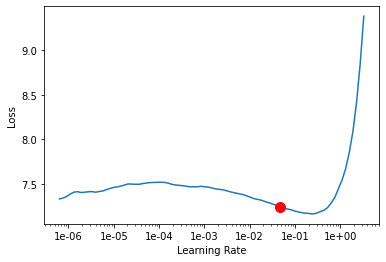

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,6.215612,5.871806,0.168328,15:05
1,5.715634,5.350116,0.198695,15:38


In [ ]:
learn.predict("this is not working", n_words=10)

'this is not working on tgithub com coreclr can add by magento is possible'

In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (120000 items)
x: TextList
xxbos dotnet should list help as a subcommand for each xxunk is this net command line xxunk dotnet common options command arguments arguments command the command to execute arguments arguments to pass to the xxunk options passed before the command v verbose enable verbose xxunk commands compile compiles a net project publish publishes a net project for deployment run compiles and immediately executes a net xxunk common command help is a valid command that lists options for each common command but there s nothing to tell the user that,xxbos asyncfunction constructor in node xxunk you for reporting an issue this issue tracker is for bugs and issues found within node js core if you require more general support please file an issue on our helprepo please fill in as much of the template below as you re able version output of node v platform output of uname a unix or version and or bit windows subsystem if known 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 1.45E-02


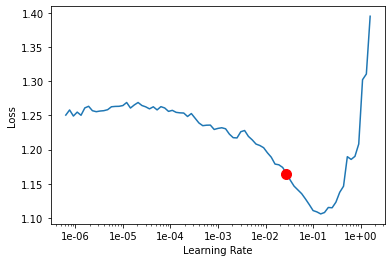

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.795940,0.695558,0.719300,04:56
1,0.774981,0.666677,0.730267,04:55


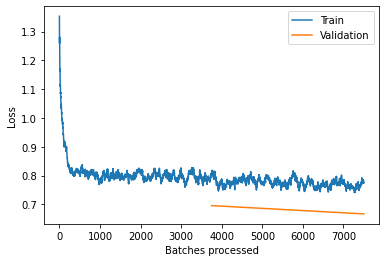

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.682228,0.582997,0.775100,05:40
1,0.595968,0.562287,0.796400,05:44
2,0.599847,0.528872,0.800933,05:42
3,0.581169,0.531586,0.802267,05:44


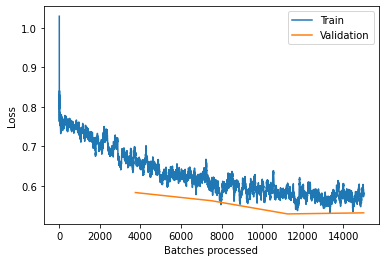

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.550736,0.513651,0.807167,11:37
1,0.574442,0.559364,0.810467,11:37
2,0.505549,0.501622,0.812167,11:32
3,0.507924,0.493643,0.816433,11:35


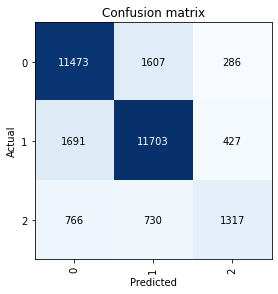

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()


In [ ]:
interp.most_confused()

NameError: ignored

In [ ]:
learn.predict("homebrew not working")

(Category tensor(0), tensor(0), tensor([0.9833, 0.0011, 0.0156]))

In [ ]:
learn.export()

In [ ]:
learn.export('/content/drive/My Drive/ml/github/ULMFiT_classifier_model.pkl')


In [ ]:
my_path = learn.path

In [ ]:
my_path

PosixPath('.')

In [ ]:
my_learn = load_learner("/content/drive/My Drive/ml/github/", 'ULMFiT_classifier_model.pkl')

In [ ]:
pred1 = my_learn.predict("How to merge two columns on pandas dataframe")

In [ ]:
type(pred1)
print(pred1)

(Category tensor(2), tensor(2), tensor([0.0075, 0.2696, 0.7229]))


# **Prepare Test data to run prediction**

In [ ]:
test['body'] = test['body'].apply(remove_url)
#test['body'] = test['body'].astype('str') 
#test['body'] = test['body'].str.replace("\\r","")
test['body'] = test['body'].str.replace("[^a-zA-Z]", " ")
test['body'] = test['body'].apply(replace_r)
test['body'] = test['body'].apply(remove_whitespace)
test['title'] = test['title'].apply(remove_url)
test['title'] = test['title'].str.replace("[^a-zA-Z]", " ")
test['title'] = test['title'].apply(replace_r)
test['title'] = test['title'].apply(remove_whitespace)
test["text"] = test["title"] + test["body"]
test = test.drop(['title', 'body'], axis=1)



In [ ]:
test

,text
0,config question path specific environment vari...
1,crash indien volde simulator crasht als hij vo...
2,unable to mine rockssarkasmo starting today wh...
3,not all whitelists are processedcreate followi...
4,add ctx menu for idafree and idafreeassociated...
...,...
29995,closing a project with running simulations doe...
29996,missing table description on db db iseries as ...
29997,cases when notification should be shownnew mes...
29998,ip errors in idea client when syncingi see the...


## Run the predictions

In [ ]:
test['prediction'] = test['text'].apply(lambda row: str(my_learn.predict(row)[0]))

In [ ]:
test

,text,prediction
0,config question path specific environment vari...,2
1,crash indien volde simulator crasht als hij vo...,0
2,unable to mine rockssarkasmo starting today wh...,0
3,not all whitelists are processedcreate followi...,0
4,add ctx menu for idafree and idafreeassociated...,1
...,...,...
29995,closing a project with running simulations doe...,0
29996,missing table description on db db iseries as ...,0
29997,cases when notification should be shownnew mes...,0
29998,ip errors in idea client when syncingi see the...,0


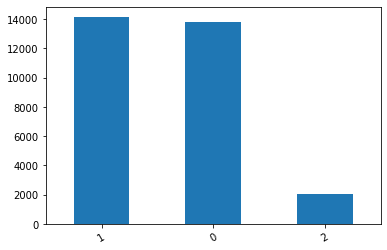

In [ ]:
test['prediction'].value_counts().plot.bar(rot=30);


In [ ]:
test.to_csv('/content/drive/My Drive/ml/github/prediction.csv')

In [ ]:
test = test.rename(columns={'prediction': 'label'})

In [ ]:
test

,text,label
0,config question path specific environment vari...,2
1,crash indien volde simulator crasht als hij vo...,0
2,unable to mine rockssarkasmo starting today wh...,0
3,not all whitelists are processedcreate followi...,0
4,add ctx menu for idafree and idafreeassociated...,1
...,...,...
29995,closing a project with running simulations doe...,0
29996,missing table description on db db iseries as ...,0
29997,cases when notification should be shownnew mes...,0
29998,ip errors in idea client when syncingi see the...,0


In [ ]:
test.to_csv('/content/drive/My Drive/ml/github/submission_Oct12.csv', columns=['label'], index=False)

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [ ]:
# tokenization 
tokenized_doc = train['body'].apply(lambda x: x.split())

In [ ]:
# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])


In [ ]:
tokenized_doc

0                        [zoom, piano, roll, would, useful]
1         [screenshot, https, cloud, githubusercontent, ...
2         [hi, r, r, great, job, far, saenzramiro, r, r,...
3         [think, stop, logging, requests, r, health, r,...
4         [expected, behavior, r, alarm, actions, pid, p...
                                ...                        
149995    [note, anything, within, brackets, hidden, pre...
149996    [noted, nicholst, neurovault, images, display,...
149997    [raml, r, r, yaml, r, raml, r, title, test, r,...
149998                  [see, r, r, occurs, branch, routes]
149999    [process, headings, inside, quotes, code, sect...
Name: body, Length: 150000, dtype: object

In [ ]:
# de-tokenization 
detokenized_doc = [] 
for i in range(len(train)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

In [ ]:
train['body'] = detokenized_doc

In [ ]:
train.head()

,title,body,label
0,y-zoom piano roll,zoom piano roll would useful,1
1,buggy behavior in selection,screenshot https cloud githubusercontent com a...,0
2,auto update feature,hi r r great job far saenzramiro r r auto upda...,1
3,filter out noisy endpoints in logs,think stop logging requests r health r gtg r f...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior r alarm actions pid pid enab...,0
